<a href="https://colab.research.google.com/github/darkar18/style-interface/blob/main/Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import torch
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
import pandas as pd

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.1 MB/s eta 0:00:00


In [ ]:
import transformers

# Load pre-trained BERT model
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

In [ ]:
!unzip /content/drive/MyDrive/dataset/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [ ]:
csvfile = pd.read_csv("/content/list_attr_celeba.csv")
csvfile1 = pd.read_csv("/content/list_bbox_celeba.csv")
csvfile2 = pd.read_csv("/content/list_eval_partition.csv")
csvfile3= pd.read_csv("/content/list_landmarks_align_celeba.csv")

In [ ]:
df=pd.DataFrame(csvfile)
df=df.drop('image_id',axis=1)
np_array0 = df.to_numpy()
print(np_array0)

[[-1  1  1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1  1]
 ...
 [-1 -1 -1 ... -1 -1  1]
 [-1  1  1 ... -1 -1  1]
 [-1  1  1 ... -1 -1  1]]


In [ ]:
np_array0.shape

(202599, 40)

In [ ]:
np_array0[0]

array([-1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1])

In [ ]:
df=pd.DataFrame(csvfile3)
df=df.drop('image_id',axis=1)
np_array3 = df.to_numpy()

print(np_array3)

[[ 69 109 106 ... 152 108 154]
 [ 69 110 107 ... 151 108 153]
 [ 76 112 104 ... 156  98 158]
 ...
 [ 69 111 107 ... 151 109 153]
 [ 69 111 108 ... 153 106 151]
 [ 68 111 109 ... 150 103 152]]


In [ ]:
latent_representations = np.concatenate((np_array0, np_array3), axis=1)

In [ ]:
import torch
import torch.nn as nn
from sklearn.decomposition import PCA

In [ ]:
a = ['5_o_Clock_Shadow',
'Arched Eyebrows',
'Attractive',
'Bags Under Eyes', 
'Bald',
'Bangs',
'Big Lips',
'Big Nose',
'Black Hair',
'Blond Hair',
'Blurry',
'Brown Hair',
'Bushy Eyebrows',
'Chubby',
'Double Chin',
'Eyeglasses',
'Goatee',
'Gray Hair',
'Heavy Makeup',
'High Cheekbones',
'Male',
'Mouth Slightly Open',
'Mustache',
'Narrow Eyes',
'No Beard',
'Oval Face',
'Pale Skin',
'Pointy Nose',
'Receding Hairline',
'Rosy Cheeks',
'Sideburns',
'Smiling',
'Straight Hair',
'Wavy Hair',
'Wearing Earrings',
'Wearing Hat',
'Wearing Lipstick',
'Wearing Necklace',
'Wearing Necktie',
'Young']

c = ['lefteye is located at x-coordinate', 
'lefteye is located at y-coordinate', 
'righteye is located at x-coordinate', 
'righteye is located at yx-coordinate', 
'nose is located at x-coordinate',
'nose is located at y-coordinate', 
'left side of mouth is located at x-coordinate', 
'left side of mouth is located at y-coordinate', 
'right side of mouth is located at x-coordinate', 
'right side of mouth is located at y-coordinate']

b = ['Clean-shaven',
'Straight Eyebrows',
'Unattractive',
'Clear Eyes',
'Hairy',
'No Bangs',
'Small Lips',
'Small Nose',
'Blond Hair',
'Black Hair',
'Clear',
'Blonde Hair',
'Thin Eyebrows',
'Skinny',
'No Double Chin',
'No Glasses',
'Without a Goatee',
'Colored Hair',
'Natural Look',
'Low Cheekbones',
'Female',
'Mouth Closed',
'No Mustache',
'Wide Eyes',
'Beard',
'Square Face',
'Tanned Skin',
'Rounded Nose',
'Full Hairline',
'Pale Cheeks',
'No Sideburns',
'Frowning',
'Curly Hair',
'Straight Hair',
'Not Wearing Earrings',
'Not Wearing Hat',
'Not Wearing Lipstick',
'Not Wearing Necklace',
'Not Wearing Necktie',
'Old'
]

In [ ]:
z=[]

In [ ]:
for i in range(90000,100000):
  st=''
  for j in range(40):
      if(np_array0[i][j]==1):
          st = st+" "+a[j]
      else:
          st = st+" "+b[j]
      st = st.lower()  
  for j in range(10):
      st = st + " "+ c[j] + " " + str(np_array3[i][j])

  # Tokenize the input text
  input_ids = tokenizer.encode(st, return_tensors='pt')
  # Pass the input through the model
  with torch.no_grad():
      output = model(input_ids)
      last_hidden_state = output[0]  # get the last hidden state
  pca = PCA(n_components=2)
  reduced_vectors = pca.fit_transform(last_hidden_state[0].numpy())      
  z.append(reduced_vectors)
  print(i)

90000
90001
90002
90003
90004
90005
90006
90007
90008
90009
90010
90011
90012
90013
90014
90015
90016
90017
90018
90019
90020
90021
90022
90023
90024
90025
90026
90027
90028
90029
90030
90031
90032
90033
90034
90035
90036
90037
90038
90039
90040
90041
90042
90043
90044
90045
90046
90047
90048
90049
90050
90051
90052
90053
90054
90055
90056
90057
90058
90059
90060
90061
90062
90063
90064
90065
90066
90067
90068
90069
90070
90071
90072
90073
90074
90075
90076
90077
90078
90079
90080
90081
90082
90083
90084
90085
90086
90087
90088
90089
90090
90091
90092
90093
90094
90095
90096
90097
90098
90099
90100
90101
90102
90103
90104
90105
90106
90107
90108
90109
90110
90111
90112
90113
90114
90115
90116
90117
90118
90119
90120
90121
90122
90123
90124
90125
90126
90127
90128
90129
90130
90131
90132
90133
90134
90135
90136
90137
90138
90139
90140
90141
90142
90143
90144
90145
90146
90147
90148
90149
90150
90151
90152
90153
90154
90155
90156
90157
90158
90159
90160
90161
90162
90163
90164
90165
9016

In [ ]:
z

In [ ]:
z[0].shape

In [ ]:
d = np.array(z[0][0])
n = z[0].shape
m = int(''.join(map(str, n)))
q = m//10
for i in range(1,q):
    f = np.array(z[0][i])
    d = np.vstack((d,f))
for i in range(1,10000):
  n = z[i].shape
  m = int(''.join(map(str, n)))
  q = m//10
  for j in range(q):
    f = np.array(z[i][j])
    d = np.vstack((d,f))

In [ ]:
z[0][0]

In [ ]:
z[9999]

In [ ]:
d

In [ ]:
print(d[0])

In [ ]:
d.shape

In [ ]:
np.save('/content/drive/MyDrive/dataset/my_array(90k-100k).npy', d)

In [ ]:
np.savetxt('/content/drive/MyDrive/dataset/my_array(90k-100k).csv', d, delimiter=',')

In [ ]:
print("Done!!")

In [ ]:
# Load the npy file
data = np.load('my_array.npy')

# Print the data
print(data)

[[ 1.6488014 -1.3152978]
 [-2.2918856 -1.5236555]
 [-2.4949553  1.5442743]
 ...
 [ 7.748099  -5.8966618]
 [ 3.713275  -3.1376684]
 [ 2.0362105  0.7345333]]


In [ ]:
for i in range(len(data)):
  print(data[i])

[ 1.6488036 -1.3154478]
[-2.2918818 -1.5237993]
[-2.4949589  1.5443002]
[-4.8647723 -1.6426163]
[-4.3057213  2.003104 ]
[-4.581419   -0.51791537]
[-5.25175   -0.9358046]
[-3.9640083   0.08510832]
[-5.728564 -1.018659]
[-4.9474006 -1.5045682]
[-5.0094705 -0.7950706]
[-5.5904965   0.40597343]
[-5.342407 -2.594743]
[-5.1269107  0.3631528]
[-6.4021807 -0.3881111]
[-4.3219237  0.6543099]
[-6.316522  -0.3327087]
[-6.0859346 -1.8241035]
[-6.278041  -0.7581461]
[-5.9025655 -0.7623611]
[-5.942335  -0.7087158]
[-5.751868  -0.7065313]
[-5.5628033 -2.463547 ]
[-6.237861   -0.39267972]
[-6.3441925  -0.50321114]
[-6.3537574 -2.2065983]
[-5.7757826 -1.0480818]
[-4.2886186  1.3143874]
[-3.7911365 -1.6318654]
[-3.9674227 -2.4429743]
[-3.9198685  2.5243447]
[-4.148067  -1.8774122]
[-3.4692912  2.3748975]
[-4.350995   2.1592276]
[-5.159068 -2.858615]
[-3.5008142  0.8131179]
[-4.785138    0.55832434]
[-6.2469115 -0.8534385]
[-6.040588   -0.04871712]
[-6.4510064 -2.004799 ]
[-5.3711433  1.0199001]
[-5.8194

In [ ]:
x_coords = [latent_vector[0] for latent_vector in d]
y_coords = [latent_vector[1] for latent_vector in d]

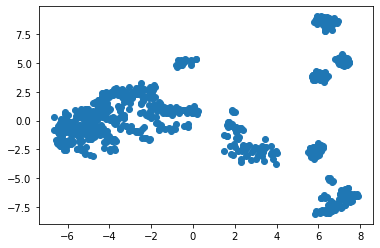

In [ ]:
plt.scatter(x_coords, y_coords)

In [ ]:
mean = np.mean(reduced_vectors, axis=0)
std = np.std(reduced_vectors, axis=0)
normalized_latent_space=(mean-reduced_vectors)/std

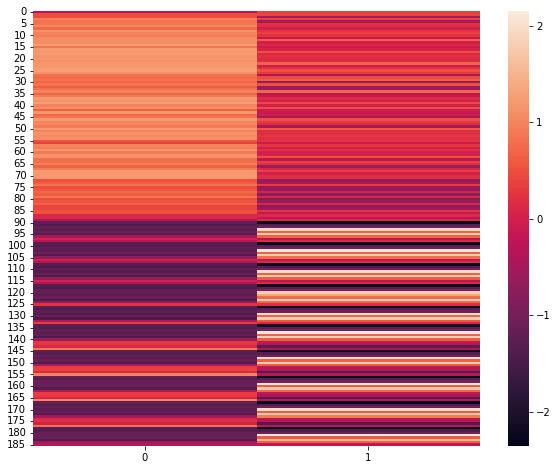

In [ ]:
plt.figure(figsize=(10, 8))
h1=sn.heatmap(data=normalized_latent_space)

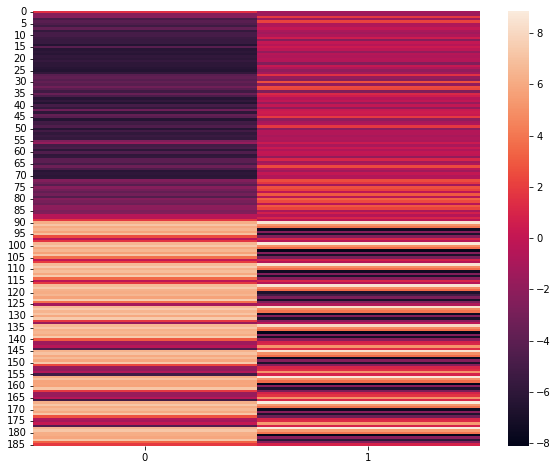

In [ ]:
plt.figure(figsize=(10, 8))
hm = sn.heatmap(data = reduced_vectors)

In [ ]:
new_min = -1
new_max = 1
current_min = np.min(reduced_vectors)
current_max = np.max(reduced_vectors)

In [ ]:
scaled_latent_space = ((reduced_vectors - current_min) / (current_max - current_min)) * (new_max - new_min) + new_min
np.save('scaled_latent_space.npy', scaled_latent_space)

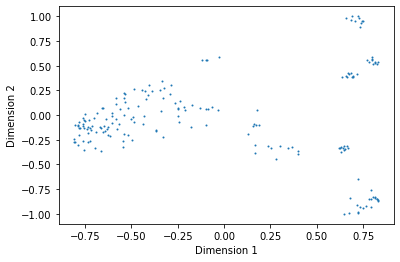

In [ ]:
scaled_latent_space = np.load('scaled_latent_space.npy')

# Plot the first two dimensions of the scaled latent space
plt.scatter(scaled_latent_space[:, 0], scaled_latent_space[:, 1], s=1)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
translation = np.array([0.5, 0.5])
translated_latent_space = scaled_latent_space + translation
np.save('translated_latent_space.npy', translated_latent_space)

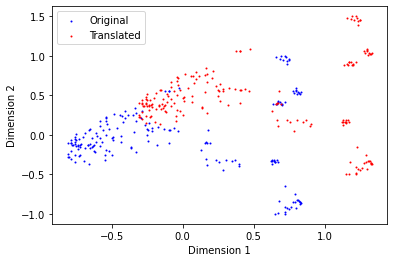

In [ ]:
plt.scatter(scaled_latent_space[:, 0], scaled_latent_space[:, 1], s=1, c='blue', label='Original')
plt.scatter(translated_latent_space[:, 0], translated_latent_space[:, 1], s=1, c='red', label='Translated')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [ ]:
theta = np.pi / 4

# Define rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

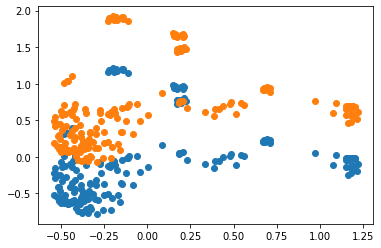

In [ ]:
rotated_latent_space = np.dot(R, scaled_latent_space.T).T
rotated_latent_space1 = np.dot(R, translated_latent_space.T).T
# Plot rotated latent space
import matplotlib.pyplot as plt
plt.scatter(rotated_latent_space[:, 0], rotated_latent_space[:, 1])
plt.scatter(rotated_latent_space1[:, 0], rotated_latent_space1[:, 1])
plt.show()

In [ ]:
start_point = rotated_latent_space[0]
end_point = rotated_latent_space[100]

start_point1 = rotated_latent_space1[0]
end_point1 = rotated_latent_space1[100]

# Define number of interpolation steps
n_steps = 10

# Perform latent space interpolation
interpolated_points = np.zeros((n_steps, rotated_latent_space.shape[1]))
for i in range(n_steps):
    t = i / (n_steps - 1)
    interpolated_points[i] = start_point + t * (end_point - start_point)

interpolated_points1 = np.zeros((n_steps, rotated_latent_space1.shape[1]))
for i in range(n_steps):
    t = i / (n_steps - 1)
    interpolated_points1[i] = start_point + t * (end_point - start_point)


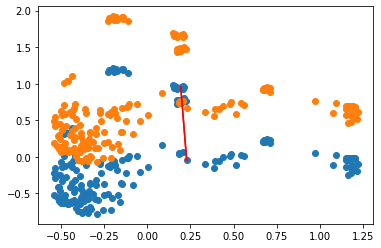

In [ ]:
plt.scatter(rotated_latent_space[:, 0], rotated_latent_space[:, 1])
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'r')

plt.scatter(rotated_latent_space1[:, 0], rotated_latent_space1[:, 1])
plt.plot(interpolated_points1[:, 0], interpolated_points1[:, 1], 'r')
plt.show()





In [ ]:
class PixelNorm(nn.Module):
    def __init__(self):
        super(PixelNorm, self).__init__()

    def forward(self, x, epsilon=1e-8):
        return x * torch.rsqrt(torch.mean(x ** 2, dim=1, keepdim=True) + epsilon)
class MappingNetwork(nn.Module):
    def __init__(self, z_dim=2, w_dim=202599, num_layers=8):
        super().__init__()
        layers = [PixelNorm()]

        for i in range(num_layers):
            layers.append(nn.Linear(z_dim if i == 0 else w_dim, w_dim))
            layers.append(nn.LeakyReLU(0.2))

        self.mapping = nn.Sequential(*layers)

    def forward(self, z):
        z = z.view(z.size(0), -1)
        w = self.mapping(z)
        return w

In [ ]:
z_rotated_tensor = torch.from_numpy(rotated_latent_space)
z_rotated_tensor

tensor([[ 0.2287, -0.0452],
        [-0.0794, -0.3904],
        [-0.3556, -0.1091],
        [-0.2862, -0.5883],
        [-0.5301, -0.2288],
        [-0.3108, -0.5083],
        [-0.3799, -0.5631],
        [-0.3279, -0.3791],
        [-0.4023, -0.6153],
        [-0.3022, -0.5850],
        [-0.3493, -0.5430],
        [-0.5021, -0.4695],
        [-0.2571, -0.7297],
        [-0.4746, -0.5190],
        [-0.5005, -0.6375],
        [-0.3830, -0.3832],
        [-0.5091, -0.6015],
        [-0.3554, -0.7211],
        [-0.4870, -0.6242],
        [-0.4241, -0.6224],
        [-0.4717, -0.6046],
        [-0.4233, -0.5854],
        [-0.2898, -0.7825],
        [-0.5194, -0.5555],
        [-0.4577, -0.6479],
        [-0.3779, -0.7672],
        [-0.3903, -0.6482],
        [-0.4712, -0.2813],
        [-0.1710, -0.5298],
        [-0.1583, -0.6154],
        [-0.5321, -0.1565],
        [-0.2020, -0.5706],
        [-0.4722, -0.1283],
        [-0.5404, -0.2205],
        [-0.2088, -0.7268],
        [-0.3889, -0

In [ ]:
mapping_network = MappingNetwork()
mapping_network = mapping_network.to(z_rotated_tensor.dtype)
w = mapping_network(z_rotated_tensor)




In [ ]:
type(mapping_network)